In [52]:
import nltk  # natural language processing library
import scipy.stats as ss  # statistical functions required to assign ranks
import matplotlib.pyplot as plt # to plot graphs
import math # for taking lagarithm in Zipf's eaquation

In [4]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to /Users/akshay./nltk_data...


True

In [2]:
from nltk.corpus import reuters
# nltk library has some corpuses like reuters, brown, etc present in it.

In [5]:
reuters_words = [w.lower() for w in reuters.words()] # converting all words in lower case for simplicity
words = set(reuters_words) # used to Set function to get rid of duplicate words
counts = [(w, reuters_words.count(w)) for w in words] # creating a list of tuples, each tuple having a
                                                      # word and its frequency in the corpus.

In [6]:
# Separating words and their counts from the tuples in the list counts
words_1 = [w for (w,c) in counts]
counts_1 = [c for (w,c) in counts]

In [7]:
count_rank = ss.rankdata([c for (w,c) in counts])
# rankdata function assigns highest rank to highest value/frequency.
# in case of same frequencies of different words rankdata uses average method by default
# The average of the ranks that would have been assigned to all the tied values is assigned to each value.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rankdata.html  (reference)
count_rank

array([24564. , 13183.5, 20936.5, ..., 20936.5, 13183.5, 16537.5])

In [36]:
# combining each word, its count and its rank in a tuple
counts_ranked = list(zip(words_1,counts_1,count_rank))
#caution for applying list method on zip objects: https://tinyurl.com/yc3sets2
counts_ranked[500:505]

[('aghia', 1, 5513.0),
 ('attaka', 2, 13183.5),
 ('601', 17, 25351.0),
 ('tumaco', 5, 19949.0),
 ('promotional', 7, 21705.5)]

In [47]:
counts_sorted = sorted(counts_ranked, key=lambda x:x[-1])
# https://tinyurl.com/4bwkx6xd (reference)
counts_sorted[13183]

('reinvested', 2, 13183.5)

### Zipf's law
$f = C*r^{-\alpha} \newline$
$log(f) = logC -\alpha*log(r) $ <br/>
$y = k + mx$ (straight line)

$y = logf$ which is equal to log of word counts in our tuple list
$x = log(r)$ 

In zipfs law, frequency is inversely proportional to rank. So we have to reverse our ranks for zipf's law
Which can be done by: L+1-r, where L is total unique words

In [ ]:
L = len(counts_sorted)

Text(0, 0.5, 'log(f)')

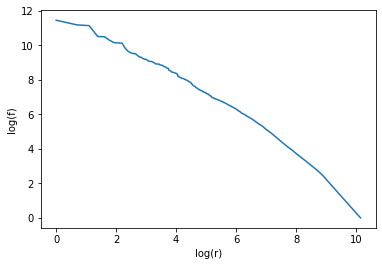

In [56]:
# plotting graph x vs y i.e. log(L+1-r) vs log(c)
plt.plot([math.log(L-r+1) for (w,c,r) in counts_sorted], [math.log(c) for (w,c,r) in counts_sorted])
plt.xlabel('log(r)')
plt.ylabel('log(f)')

We have many points(x,y) but they are not be collinear
We use least square method to find a line (or particular values of m and k) which fits to all these points as close possible.
(Similar to what we do in Linear Regression) <br/>

$\begin{bmatrix}
x_1 & 1\\
x_2 & 1\\
x_3 & 1
\end{bmatrix}*\begin{bmatrix}
m\\
k
\end{bmatrix} = \begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}$ <br/>

$\implies Ax = b \newline A^TAx=A^Tb$

Least square solution:
$\hat{x}=(A^TA)^{-1}A^Tb$

In [57]:
import numpy as np

In [84]:
x = np.array([math.log(L-r+1) for (w,c,r) in counts_sorted])
y = np.array([math.log(c) for (w,c,r) in counts_sorted])
np.shape(x)

(31078,)

<img src="stacks.png" alt="stacks_illustration" width="400"/>

In [85]:
x

array([10.14901862, 10.14901862, 10.14901862, ...,  1.09861229,
        0.69314718,  0.        ])

In [86]:
x = x.reshape(len(x),1)
x

array([[10.14901862],
       [10.14901862],
       [10.14901862],
       ...,
       [ 1.09861229],
       [ 0.69314718],
       [ 0.        ]])

In [87]:
A = np.hstack( ( x, np.ones((len(x),1)) ) )
np.shape(A)

(31078, 2)

In [90]:
b = y.reshape(len(y),1)
np.shape(b)

(31078, 1)

In [93]:
sol = np.dot(A.T,A) # (A^T A)
sol = np.linalg.inv(sol) # (A^T A)^-1
sol = np.dot( np.dot(sol,A.T), b)
np.shape(sol)

(2, 1)

In [94]:
sol

array([[-1.59893073],
       [16.37719998]])

Text(0, 0.5, 'log(freq)')

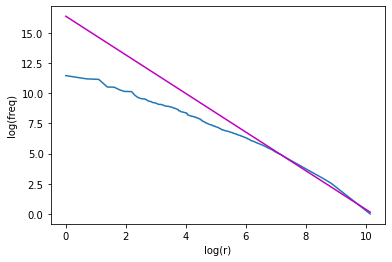

In [97]:
plt.plot(x,y)
plt.plot(x, np.dot(A,sol), 'm')
plt.xlabel('log(r)')
plt.ylabel('log(freq)')